<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# Linear Regression

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1 선형 회귀

|모델 | 설명|
|:--- |:---|
|일반 선형 회귀 | 예측값과 측정값의 오차를 최소화할 수 있도록 회귀 계수를 최적화|
|릿지(Ridge) | 선형 회귀에 L2 규제를 추가한 모델. L2 규제는 상대적으로 큰 회귀 계수값을 더 작게 만드는 규제 모델|
|라쏘(Lasso) | 선형 회귀에 L1 규제를 추가한 모델. L1 규체즌 영향력이 작은 피처의 회귀 계수값을 0으로 만드는 규제 모델(피처 선택 기능)|
|엘라스틱넷(ElasticNet) | L2 규제와 L1 규제를 결합한 모델. 주로 피처가 많은 데이터 셋에 적용|
|로지스틱 회귀(Logistic Regression) | 분류에 사용되는 선형 회귀 모델|

### 1.1 선형 회귀 적용

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], df['target'])

In [4]:
# Visual Python: Machine Learning > Regressor
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [5]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([31.30167265, 37.61631538, 32.22694875, 19.3672012 ,  8.96504533,
       26.54142485, 25.96941478, 21.56659228, 27.16699919, 40.92795485,
       31.49842494, 26.28204635, 17.88062261, 30.46331051, 19.09279093,
       23.17420593, 16.17277092, 18.33163885, 12.36814619, 21.2852509 ,
       22.77423542, 24.01221187, 25.55188541, 19.80758352, 19.88859309,
       28.82091498, 25.37739767, 25.46305053, 37.3033088 , 24.63980962,
       22.38404838, 21.59786807, 28.90145862, 17.4180672 , 34.53995712,
       31.14813579, 16.17855084, 34.06401836, 10.47985628, 23.77121437,
       20.31693739, 22.33716951, 28.67903384, 19.28139514, 12.0157108 ,
       22.01142526, 25.19500633, 11.0897657 , 28.96232095, 25.11561779,
       28.74002034,  5.42345591, 32.67449013, 17.81707345, 20.40768271,
       24.35755422, 14.78558142, 22.42743877, 26.74060719, 11.54950767,
       20.80828237, 20.39518028, 26.38790268, 10.86859939, 20.60311162,
        0.44223233, 19.33090165, 24.54122459, 18.72037339, 24.67

In [7]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [8]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [9]:
# Visual Python: Machine Learning > Evaluation
# R squared
print('R squared: {}'.format(metrics.r2_score(y_test, pred)))

R squared: 0.5360820563694668


In [10]:
# Visual Python: Machine Learning > Evaluation
# MAE(Mean Absolute Error)
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, pred)))

MAE: 3.3138336687721406


In [11]:
# Visual Python: Machine Learning > Evaluation
# RMSE(Root Mean Squared Error)
print('RMSE: {}'.format(metrics.mean_squared_error(y_test, pred)**0.5))

RMSE: 5.042888815384737


### Regression plot

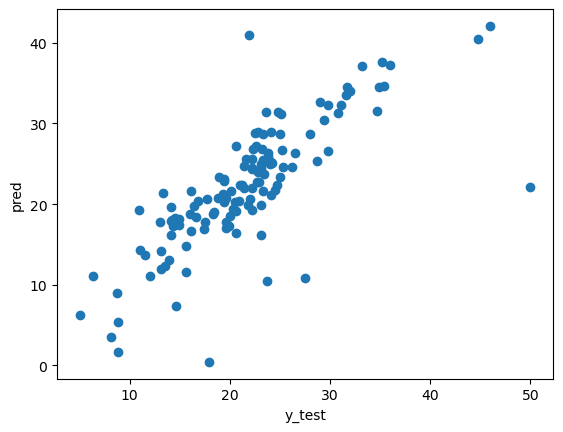

In [12]:
# Visual Python: Machine Learning > Evaluation
# Regression plot
display(Markdown('### Regression plot'))
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

#### Information

In [13]:
# 절편
# Visual Python: Machine Learning > Model Info
intercepts = model.intercept_
intercepts

26.591608302632054

In [14]:
# 회귀 계수
# Visual Python: Machine Learning > Model Info
coef = model.coef_
coef

array([-1.15743678e-01,  4.56330542e-02,  3.02544640e-02,  3.28666956e+00,
       -1.87156618e+01,  5.02218007e+00,  7.90006794e-03, -1.39776785e+00,
        2.97534528e-01, -1.17158748e-02, -9.01924761e-01,  1.04203923e-02,
       -4.83745156e-01])

In [15]:
sorted(coef, reverse=True)

[5.022180069587775,
 3.286669563169481,
 0.2975345281669976,
 0.045633054221547925,
 0.030254464045615267,
 0.010420392307311756,
 0.007900067938022302,
 -0.011715874819963716,
 -0.11574367776752605,
 -0.48374515589530076,
 -0.9019247611668523,
 -1.397767845136631,
 -18.715661824762336]

#### 모델 저장 및 불러오기

In [16]:
# Visual Python: Machine Learning > Save/Load
import joblib

In [17]:
# Visual Python: Machine Learning > Save/Load
joblib.dump(model, './data/model.pkl')

['./data/model.pkl']

In [18]:
# Visual Python: Machine Learning > Save/Load
model_load = joblib.load('./data/model.pkl')

In [19]:
# Visual Python: Machine Learning > Model Info
intercepts = model_load.intercept_
intercepts

26.591608302632054

#### Cross validation

In [20]:
# Visual Python: Machine Learning > Model Info
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']], df['target'], scoring='neg_root_mean_squared_error')
scores

array([-3.52991509, -5.10378498, -5.75101191, -8.9867887 , -5.77179405])

In [21]:
# RMSE
scores * -1

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [22]:
# RMSE 평균
round((scores * -1).mean(), 2)

5.83

# 2 로지스틱 회귀

- Sigmoid function
- Softmax function

### 2.1 데이터 로딩

In [23]:
# Visual Python: Machine Learning > Data Sets
from sklearn.datasets import load_breast_cancer

ldata = load_breast_cancer()
# Create DataFrame
df_ldata = pd.DataFrame(data=ldata.data, columns=ldata.feature_names)
df_ldata['target'] = ldata.target
df_ldata

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [24]:
# Visual Python: Data Analysis > Subset
X = df_ldata.loc[:, ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error','concave points error','symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']]
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
# Visual Python: Data Analysis > Subset
y = df_ldata.loc[:, 'target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

### 2.2 스케일링

In [26]:
# Visual Python: Machine Learning > Data Prep
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [27]:
# Visual Python: Machine Learning > Fit/Predict
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 2.3 데이터 분할

In [28]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

### 2.4 로지스틱 회귀 적용

In [29]:
# Visual Python: Machine Learning > Classifier
from sklearn.linear_model import LogisticRegression

model_l = LogisticRegression()

In [30]:
# Visual Python: Machine Learning > Fit/Predict
model_l.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Visual Python: Machine Learning > Fit/Predict
pred = model_l.predict(X_test)
pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [32]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [33]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
target,,,
0,41,1,42
1,1,100,101
All,42,101,143


In [34]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99       101

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



### 2.5 Grid Search(로지스틱 회귀) 적용

In [35]:
# Visual Python: Machine Learning > Pipeline
# [1] GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

gs = GridSearchCV(LogisticRegression(), {'C': [0.01,0.1,1,10]}, scoring='accuracy')

# [2] Fit
gs.fit(X_train, y_train)

# [3] Predict
pred = gs.predict(X_test)

# [4] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
print(metrics.classification_report(y_test, pred))

### Confusion Matrix

col_0,0,1,All
target,,,
0,41,1,42
1,1,100,101
All,42,101,143


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99       101

    accuracy                           0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [36]:
# Visual Python: Machine Learning > Model Info
best_estimator = gs.best_estimator_
best_estimator

LogisticRegression(C=1)

In [37]:
# Visual Python: Machine Learning > Model Info
best_score = gs.best_score_
best_score

0.976497948016416

In [38]:
# Visual Python: Machine Learning > Model Info
best_params = gs.best_params_
best_params

{'C': 1}

---

In [39]:
# End of file